In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('./Social_Network_Ads.csv')
print('Dataset :',data.shape)
data.info()

Dataset : (400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
Gender  = {'Male': 1,'Female': 0} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
data.Gender = [Gender[item] for item in data.Gender] 
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [4]:
from sklearn.model_selection import train_test_split
Y = data['Purchased']
X = data.drop(columns=['Purchased'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (320, 4)
Y train shape:  (320,)
X test shape:  (80, 4)
Y test shape:  (80,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# We define the model
rfcla = RandomForestClassifier(n_estimators=10,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
rfcla_cm


array([[45,  3],
       [ 5, 27]], dtype=int64)

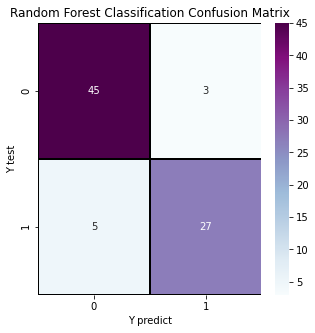

In [6]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=150, random_state=1)



from sklearn.metrics import accuracy_score

# Fit bc to the training set
bc.fit(X_train, Y_train)

# Predict test set labels
y_pred = bc.predict(X_test)


In [13]:
bgcla_cm = confusion_matrix(Y_test, y_pred)
bgcla_cm


array([[46,  2],
       [ 3, 29]], dtype=int64)

In [14]:
# Evaluate acc_test
acc_test = accuracy_score(Y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))


Test set accuracy of bc: 0.94


In [15]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=50)
ada_boost_clf.fit(X_train, Y_train)
a=ada_boost_clf.predict(X_test)

bocla_cm = confusion_matrix(Y_test, a)
bocla_cm


array([[46,  2],
       [10, 22]], dtype=int64)

In [16]:
acc_test = accuracy_score(Y_test, a)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))


Test set accuracy of bc: 0.85
